In [3]:
%load_ext autoreload
%autoreload 2


from ff_energy.ffe.slurm import SlurmJobHandler
from pathlib import Path
import pandas as pd
import jax.numpy as jnp
import itertools as it
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import patchworklib as pw


from ff_energy.ffe.potential import (
    LJ,
    DE,
)

from ff_energy.ffe.ff import FF
from ff_energy.ffe.constants import FFEPATH
from ff_energy.plotting.ffe_plots import plot_energy_MSE, plot_ff_fit

from ff_energy.plotting.plotting import set_style, patchwork_grid, save_fig


from ff_energy.plotting.fit_results import (
    residuals_plot, simple_residuals_plot, residuals_from_keys
)

from ff_energy.logs.logging import hide_logs

from ff_energy.ffe.potential import LJ, LJ_bound, DE


hide_logs()


import scienceplots
set_style(no_latex=True)

# sns.set_style()
# plt.style.use(["science", "no-latex"])


from ff_energy.ffe.ff_fit import (
    load_ff,
    fit_func,
    fit_repeat,
)

from ff_energy.utils.ffe_utils import pickle_output, read_from_pickle, str2int, PKL_PATH
from ff_energy.utils.json_utils import load_json

from ff_energy.ffe.structure import atom_key_pairs


structure_data = {
    "dcm": "",
    "water_cluster": PKL_PATH / "20230823_water_clusters.pkl.pkl",
}

intE_label = "PBE0 Energy [kcal/mol]"
FFintE_label = "FF Energy [kcal/mol]"

import matplotlib.pyplot as mpl

mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
]  

import pylab as plt
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)

0 ('C', 'C')
1 ('C', 'CG331')
2 ('C', 'CL')
3 ('C', 'CLA')
4 ('C', 'H')
5 ('C', 'HGA3')
6 ('C', 'HGP1')
7 ('C', 'HT')
8 ('C', 'OG311')
9 ('C', 'OT')
10 ('C', 'POT')
11 ('CG331', 'CG331')
12 ('CG331', 'CL')
13 ('CG331', 'CLA')
14 ('CG331', 'H')
15 ('CG331', 'HGA3')
16 ('CG331', 'HGP1')
17 ('CG331', 'HT')
18 ('CG331', 'OG311')
19 ('CG331', 'OT')
20 ('CG331', 'POT')
21 ('CL', 'CL')
22 ('CL', 'CLA')
23 ('CL', 'H')
24 ('CL', 'HGA3')
25 ('CL', 'HGP1')
26 ('CL', 'HT')
27 ('CL', 'OG311')
28 ('CL', 'OT')
29 ('CL', 'POT')
30 ('CLA', 'CLA')
31 ('CLA', 'H')
32 ('CLA', 'HGA3')
33 ('CLA', 'HGP1')
34 ('CLA', 'HT')
35 ('CLA', 'OG311')
36 ('CLA', 'OT')
37 ('CLA', 'POT')
38 ('H', 'H')
39 ('H', 'HGA3')
40 ('H', 'HGP1')
41 ('H', 'HT')
42 ('H', 'OG311')
43 ('H', 'OT')
44 ('H', 'POT')
45 ('HGA3', 'HGA3')
46 ('HGA3', 'HGP1')
47 ('HGA3', 'HT')
48 ('HGA3', 'OG311')
49 ('HGA3', 'OT')
50 ('HGA3', 'POT')
51 ('HGP1', 'HGP1')
52 ('HGP1', 'HT')
53 ('HGP1', 'OG311')
54 ('HGP1', 'OT')
55 ('HGP1', 'POT')
56 ('HT', 'HT'

<Figure size 100x100 with 0 Axes>

In [4]:
lj = next(read_from_pickle( PKL_PATH / "ELECpol_dcm_lj_intE.pkl"))

2023-09-29 11:15:48 | INFO | xla_bridge:backends:450 - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-09-29 11:15:48 | INFO | xla_bridge:backends:450 - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-09-29 11:15:48 | INFO | xla_bridge:backends:450 - Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023-09-29 11:15:48 | INFO | xla_bridge:backends:450 - Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
2023-09-29 11:15:48 | WARNING | xla_bridge:backends:458 - No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [5]:
lj_res_pol = pd.DataFrame(lj.opt_results)
# 2.490e+00  2.397e+00  1.216e+00  8.306e-03  3.579e-02
                  # 1.637e-02

In [201]:
lj.out_dists #.sort_values("fun")
lj.out_akps.shape
lj.out_groups.shape

(950000,)

In [203]:
deff.out_dists = lj.out_dists
deff.out_akps = lj.out_akps
deff.out_groups = lj.out_groups

In [191]:
lj.out_dists

Array([10.841139 ,  4.4103775, 10.883423 , ..., 13.00606  ,  9.838848 ,
       11.272764 ], dtype=float32)

In [1]:
lj.get

NameError: name 'lj' is not defined

In [197]:
# deff = next(read_from_pickle(PKL_PATH / "ELECpol_dcm_intE_fitted.pkl"))

In [198]:
# deff = next(read_from_pickle(PKL_PATH / "ELECpol_dcm_de_intE_fitted.pkl"))

In [18]:
pd.DataFrame(deff.opt_results)

,fun,nit,nfev,status,success,message,x,final_simplex
0,24.430481,937,1576,0,True,Optimization terminated successfully.,"[2.278238940581436, 3.5427107785950747, 5.4999...","([[2.278238940581436, 3.5427107785950747, 5.49..."
1,24.670010,501,863,0,True,Optimization terminated successfully.,"[2.465886845914799, 3.174034209417935, 1.39431...","([[2.465886845914799, 3.174034209417935, 1.394..."
2,24.232441,927,1497,0,True,Optimization terminated successfully.,"[2.1104110239122327, 3.878647139982874, 4.2413...","([[2.1104110239122327, 3.878647139982874, 4.24..."
3,24.455376,679,1105,0,True,Optimization terminated successfully.,"[1.6644860772965224, 4.427071360283935, 0.4377...","([[1.6644860772965224, 4.427071360283935, 0.43..."
4,24.699282,350,663,0,True,Optimization terminated successfully.,"[2.2272644991288555, 3.5118228690312714, 1.965...","([[2.2272644991288555, 3.5118228690312714, 1.9..."
...,...,...,...,...,...,...,...,...
415,396.796875,52,248,0,True,Optimization terminated successfully.,"[0.22568262893612312, 0.7616004149898812, 4.37...","([[0.22568262893612312, 0.7616004149898812, 4...."
416,24.745556,642,1064,0,True,Optimization terminated successfully.,"[2.303145536834115, 3.874801281920037, 2.09839...","([[2.303145536834115, 3.874801281920037, 2.098..."
417,24.474873,570,972,0,True,Optimization terminated successfully.,"[0.27718961718019697, 5.499988420085132, 0.281...","([[0.27718961718019697, 5.499988420085132, 0.2..."
418,396.796875,53,249,0,True,Optimization terminated successfully.,"[0.21103900099268902, 0.791611532061415, 4.128...","([[0.21103900099268902, 0.791611532061415, 4.1..."


In [25]:
pd.DataFrame(mdeff.opt_results).sort_values("fun")["x"].iloc[0]

array([1.94234390e+00, 2.84248028e+00, 5.35634872e+00, 1.00000000e-01,
       1.26897232e-02, 4.57758687e-03, 1.75072009e+00, 1.91650035e+01])

In [176]:
deff.get_loss_jax_de([3.9714113978305994, 1.01994493223433, 1.0452494510961778, 
                      0.07547102982996604, 0.002592841394051364, 0.07826217104593282, 
                      12., 6.])

Array(46078.918, dtype=float32)

In [204]:
test = fit_repeat(
    deff, 10, f"test_dcm_de_fitted",
    # bounds=deff.bounds,
    # bounds=[(1,5), (1,5), (1,5), 
    #         (0.1, 20.1), (0.1, 20.1), (0.1, 20.1), 
    #         (1,1), (3,20), ],
    # bounds=[(1, 10.), (1, 10.), (1, 10.),
    #         (0.001, 2.001), (0.001, 2.001), (0.001, 2.001), 
    #         (60, 100), (1, 1)],
    loss="jax_de",
        maxfev=10000*1,
    quiet=False
)

loss:  jax_de
(<bound method FF.get_loss_jax_de of FF: DE dcm ELECpol Exact intE (jax_coloumb: False)>, <bound method FF.eval_jax_de of FF: DE dcm ELECpol Exact intE (jax_coloumb: False)>)
Optimizing LJ parameters...
function: get_loss_jax_de
bounds: [(0.1, 5.5), (0.1, 5.5), (0.1, 5.5), (0.001, 0.1), (0.001, 0.1), (0.001, 0.1), (1, 8), (6, 20)]
maxfev: 10000
initial guess: [0.635952412918197, 3.598898556715271, 2.6116711674932254, 0.053621226378197905, 0.04271212673196316, 0.04212405689237241, 4.927975741427859, 14.234372466481929]
final_loss_fn:  10.124580383300781
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 10.124580383300781
             x: [ 1.530e+00  2.844e+00  1.652e+00  9.751e-02  6.935e-02
                  1.735e-02  7.931e+00  6.000e+00]
           nit: 935
          nfev: 1488
 final_simplex: (array([[ 1.530e+00,  2.844e+00, ...,  7.931e+00,
                         6.000e+00],
                       [ 1.530e+

In [205]:
resdf = pd.DataFrame(test.opt_results)
resdf = resdf[resdf["success"] == True]

resdf.sort_values("fun")["x"].iloc[0]

array([1.46302621e+00, 2.38747987e+00, 1.99592182e+00, 2.61320874e-03,
       8.19672943e-02, 1.42448338e-03, 3.47631929e+00, 1.59303999e+01])

In [210]:
deff.elec = "ELECmpol"
deff.targets

Array([ 9.187753 , 15.64136  ,  3.1483908, 25.125938 , 27.501072 ,
       34.97223  ,  7.9986544, 16.626545 ,  9.869123 ,  3.177826 ,
        8.743971 , 12.088263 , 18.20848  , 19.244282 , 14.964491 ,
       14.74086  , 15.495333 , 14.301001 , 35.6791   , 17.536457 ,
       18.671968 , 23.933483 , 21.294388 ,  8.947274 , 24.725105 ,
       15.30514  , 22.541168 ,  2.6393528,  1.6785917, 19.990467 ,
       19.641571 ,  2.0653095,  7.2124405, 19.036587 , 11.150297 ,
       12.637308 ,  8.964653 , 27.340626 , 24.112286 , 19.70511  ,
       14.897859 , 21.521097 ,  4.839237 , 14.000918 , 11.125032 ,
       17.380219 , 17.56085  ,  3.9422903, 24.085608 , 33.116684 ,
       23.385468 , 13.543747 ,  7.946665 , 27.521215 ,  7.549512 ,
       28.74067  , 32.188324 ,  5.1926765, 20.482563 , 20.306618 ,
        5.5631332, 43.1134   , 16.938723 , 15.336172 ,  4.762518 ,
        9.491022 , 16.594833 , 14.176829 ,  8.316124 , 28.606993 ,
       18.021261 , 17.299696 ,  9.37726  ,  7.004652 , 18.9631

In [211]:
deff.set_targets()

In [212]:
deff.targets

Array([ -5.8230796 ,  -5.545295  ,  -9.309625  ,  -1.788003  ,
        -1.6203318 ,   0.19180298,  -7.1971946 ,  -1.7757053 ,
        -2.375023  ,  -8.927516  ,  -4.0410156 ,  -4.797967  ,
        -3.962532  ,  -3.8522015 ,  -6.669259  ,  -7.7458954 ,
        -4.5366287 ,  -2.5464745 ,   1.2287002 ,  -3.8099813 ,
        -3.85178   ,  -1.2710571 ,  -0.13427496,  -3.8725529 ,
        -1.0650377 ,  -5.4531813 ,  -6.0078983 ,  -7.207281  ,
        -7.4727087 ,  -2.344037  ,  -2.6358747 ,  -4.793257  ,
        -6.31184   ,  -4.146612  ,  -5.318619  ,  -4.466661  ,
        -8.32676   ,  -0.9740701 ,  -3.0696297 ,  -2.0325985 ,
        -3.7319922 ,  -3.0554914 ,  -9.437141  ,  -6.00564   ,
        -5.08836   ,  -6.3958015 ,  -6.184987  ,  -4.598548  ,
         1.1370301 ,   2.7654    ,  -1.8140583 ,  -7.292448  ,
        -5.7797008 ,  -2.925233  ,  -5.174575  ,  -2.7883387 ,
         0.66390896,  -7.411355  ,  -5.198205  ,  -2.98174   ,
        -7.6948466 ,   4.506499  ,  -9.958733  ,  -9.25

In [213]:
for X in resdf.sort_values("fun")["x"]:
    vals = [3.9714113978305994, 1.01994493223433, 1.0452494510961778, 
                      0.07547102982996604, 0.002592841394051364, 0.07826217104593282, 
                      ]
    vals.append(X[-1])
    vals.append(X[-2])
    fit_func(deff,
        vals,
        bounds=[(0.0, 5.5), (0.0, 5.5), (0.0, 5.5), (0.001, 10.1), (0.001, 10.1), (0.001, 10.1), (1, 20), (1, 20)],
        maxfev=10000,
        method="Nelder-Mead",
        # method="L-BFGS-B",
        loss="jax_de",
        quiet=False,)

loss:  jax_de
(<bound method FF.get_loss_jax_de of FF: DE dcm ELECmpol Exact intE (jax_coloumb: False)>, <bound method FF.eval_jax_de of FF: DE dcm ELECmpol Exact intE (jax_coloumb: False)>)
Optimizing LJ parameters...
function: get_loss_jax_de
bounds: [(0.0, 5.5), (0.0, 5.5), (0.0, 5.5), (0.001, 10.1), (0.001, 10.1), (0.001, 10.1), (1, 20), (1, 20)]
maxfev: 10000
initial guess: [3.9714113978305994, 1.01994493223433, 1.0452494510961778, 0.07547102982996604, 0.002592841394051364, 0.07826217104593282, 15.930399856232928, 3.476319288628633]
final_loss_fn:  2.1058433055877686
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 2.1058433055877686
             x: [ 1.988e+00  2.669e+00  4.420e-03  2.127e-01  4.081e-03
                  1.000e-03  2.000e+01  1.938e+00]
           nit: 1243
          nfev: 1915
 final_simplex: (array([[ 1.988e+00,  2.669e+00, ...,  2.000e+01,
                         1.938e+00],
                       [ 

In [ ]:
deff.out_dists
deff.targets

In [10]:
mdeff = next(read_from_pickle(PKL_PATH / "ELECm_dcm_de_intE_fitted.pkl"))

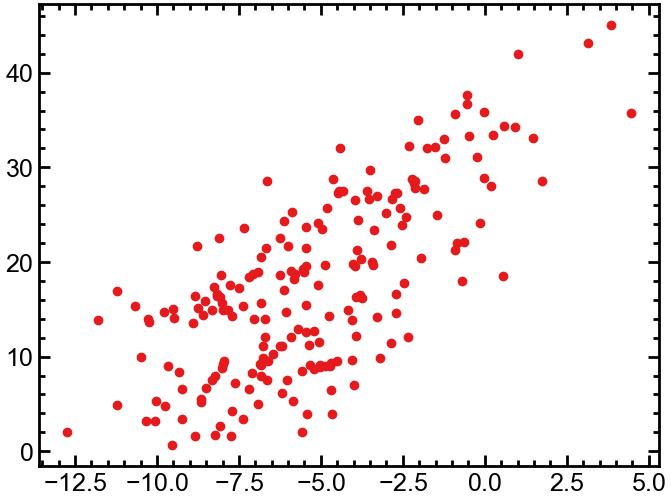

In [55]:
# mdeff.out_dists
plt.scatter(mdeff.targets, deff.targets)

In [17]:
mdeff.data[["intE", "ELECci", "ELECpol", "ELECm"]]

,intE,ELECci,ELECpol,ELECm
100_1018_DCM_120_967,-12.411790,-20.567562,-21.599542,-5.55673
100_1019_DCM_120_565,-14.488511,-28.837646,-30.129872,-7.65099
100_1024_DCM_121_932,-14.360149,-16.497216,-17.508540,-4.03920
100_1053_DCM_123_948,-11.071544,-34.970801,-36.197482,-8.05686
100_1100_DCM_129_15,-13.342866,-38.877332,-40.843937,-9.75593
...,...,...,...,...
100_979_DCM_115_117,-12.412769,-15.129841,-15.793819,-3.17565
100_983_DCM_116_25,-10.280112,-44.367339,-46.111346,-10.24308
100_986_DCM_116_989,-12.106152,-24.987267,-25.979675,-8.05472
100_98_DCM_12_534,-16.552713,-38.295094,-40.165244,-9.19456


In [16]:
mdeff.data.keys()

Index(['TOTAL', 'ELEC', 'VDW', 'KEY', 'M_ENERGY', 'KEY', 'n_monomers',
       'C_ENERGY', 'intE', 'P_intE', 'C_ENERGY_kcalmol', 'ELEC_CI', 'ELEC_POL',
       'ELECpol', 'ELECci', 'ELECp', 'ELECm', 'ELECnull', 'ELECppol',
       'ELECmpol', 'ELECnullpol', 'DUMMY'],
      dtype='object')

In [24]:
pd.DataFrame(mdeff.opt_results).sort_values("fun")["x"].iloc[0]

array([1.94234390e+00, 2.84248028e+00, 5.35634872e+00, 1.00000000e-01,
       1.26897232e-02, 4.57758687e-03, 1.75072009e+00, 1.91650035e+01])